In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 10000,
 train_size = 60000,
 random_state = 3)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


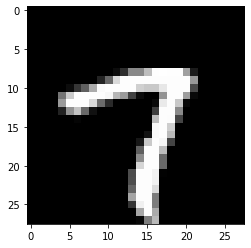

7


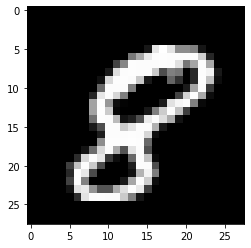

8


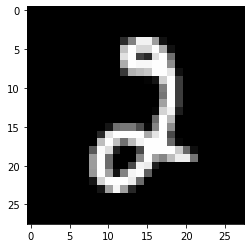

2


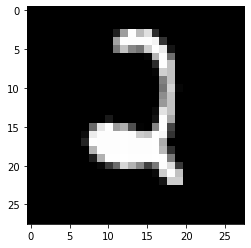

2


In [ ]:
# вывод изображения
for i in range(4):
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()
  # вывод метки для этого изображения
  print(y_train[i])


In [ ]:
# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of test X train:', X_test.shape)

Shape of transformed X train: (60000, 784)
Shape of test X train: (10000, 784)


In [ ]:
# переведем метки в one-hot
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]
print('Shape of transformed y test:', y_test.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Модель однослойной нейронной сети (кол-во скрытых слоев = 0)
# 1. создаем модель - объявляем ее объектом класса Sequential
model1 = Sequential()

# 2. добавляем выходной слой
model1.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))

# 3. компилируем модель
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model1.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8020 - accuracy: 0.8088 - val_loss: 0.5275 - val_accuracy: 0.8673
Epoch 2/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4646 - accuracy: 0.8793 - val_loss: 0.4405 - val_accuracy: 0.8815
Epoch 3/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4088 - accuracy: 0.8900 - val_loss: 0.4028 - val_accuracy: 0.8895
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3811 - accuracy: 0.8959 - val_loss: 0.3815 - val_accuracy: 0.8950
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3637 - accuracy: 0.8999 - val_loss: 0.3665 - val_accuracy: 0.8985
Epoch 6/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3512 - accuracy: 0.9030 - val_loss: 0.3562 - val_accuracy: 0.9012
Epoch 7/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.9049 - val_loss: 0.3479 - val_ac

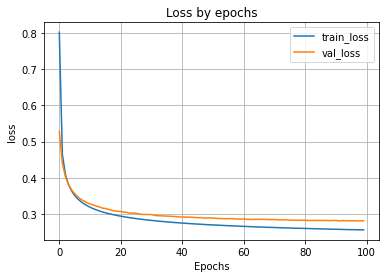

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
8
print('Accuracy on test data:', scores[1])


313/313 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9256
Loss on test data: 0.28006038069725037
Accuracy on test data: 0.925599992275238


In [ ]:
# сохранение модели на диск в папку model1
# В общем случае может быть указан произвольный путь
model1.save('model1')

In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 1, кол-во нейронов в скрытом слое = 100)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h100 = Sequential()

# 2. добавляем первый скрытый слой
model_1h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем выходной слой
model_1h100.add(Dense(units=num_classes, activation='softmax'))

# компилируем модель
model_1h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h100.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 5s 3ms/step - loss: 1.5103 - accuracy: 0.6815 - val_loss: 0.9706 - val_accuracy: 0.8183
Epoch 2/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7543 - accuracy: 0.8419 - val_loss: 0.6324 - val_accuracy: 0.8595
Epoch 3/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5546 - accuracy: 0.8687 - val_loss: 0.5126 - val_accuracy: 0.8750
Epoch 4/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.8818 - val_loss: 0.4519 - val_accuracy: 0.8842
Epoch 5/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4227 - accuracy: 0.8897 - val_loss: 0.4152 - val_accuracy: 0.8898
Epoch 6/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8946 - val_loss: 0.3897 - val_accuracy: 0.8965
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3710 - accuracy: 0.8991 - val_loss: 0.3708 - val_ac

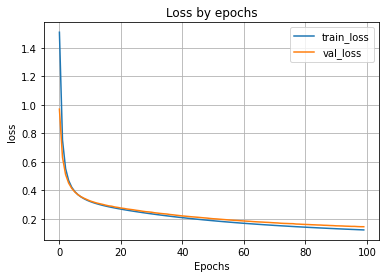

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9573
Loss on test data: 0.14656580984592438
Accuracy on test data: 0.9573000073432922


In [ ]:
# сохранение модели на диск в папку model_1h100
model_1h100.save('model_1h100')

In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 1, кол-во нейронов в скрытом слое = 300)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h300 = Sequential()

# 2. добавляем первый скрытый слой
model_1h300.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем выходной слой
model_1h300.add(Dense(units=num_classes, activation='softmax'))

# компилируем модель
model_1h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h300.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h300.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 6s 4ms/step - loss: 1.3972 - accuracy: 0.7017 - val_loss: 0.8727 - val_accuracy: 0.8142
Epoch 2/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6834 - accuracy: 0.8478 - val_loss: 0.5823 - val_accuracy: 0.8647
Epoch 3/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5151 - accuracy: 0.8721 - val_loss: 0.4827 - val_accuracy: 0.8818
Epoch 4/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4441 - accuracy: 0.8841 - val_loss: 0.4330 - val_accuracy: 0.8863
Epoch 5/100
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4050 - accuracy: 0.8903 - val_loss: 0.4022 - val_accuracy: 0.8927
Epoch 6/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3798 - accuracy: 0.8948 - val_loss: 0.3828 - val_accuracy: 0.8925
Epoch 7/100
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3625 - accuracy: 0.8987 - val_loss: 0.3663 - val_ac

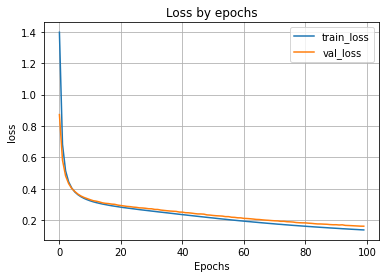

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1615 - accuracy: 0.9547
Loss on test data: 0.1615411788225174
Accuracy on test data: 0.9546999931335449


In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 1, кол-во нейронов в скрытом слое = 500)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h500 = Sequential()

# 2. добавляем первый скрытый слой
model_1h500.add(Dense(units=500, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем выходной слой
model_1h500.add(Dense(units=num_classes, activation='softmax'))

# компилируем модель
model_1h500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h500.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# сохранение модели на диск в папку model_1h300
model_1h300.save('model_1h300')

In [ ]:
# Обучаем модель
H = model_1h500.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 8s 4ms/step - loss: 1.3572 - accuracy: 0.7123 - val_loss: 0.8351 - val_accuracy: 0.8235
Epoch 2/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6535 - accuracy: 0.8511 - val_loss: 0.5653 - val_accuracy: 0.8657
Epoch 3/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4989 - accuracy: 0.8737 - val_loss: 0.4723 - val_accuracy: 0.8783
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4343 - accuracy: 0.8837 - val_loss: 0.4306 - val_accuracy: 0.8842
Epoch 5/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3987 - accuracy: 0.8906 - val_loss: 0.3969 - val_accuracy: 0.8895
Epoch 6/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3760 - accuracy: 0.8948 - val_loss: 0.3759 - val_accuracy: 0.8972
Epoch 7/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3599 - accuracy: 0.8986 - val_loss: 0.3617 - val_ac

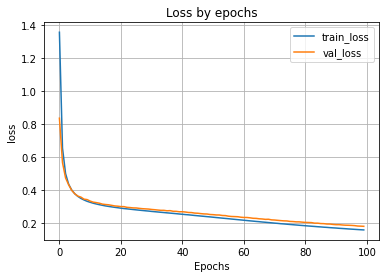

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h500.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1802 - accuracy: 0.9495
Loss on test data: 0.1801706850528717
Accuracy on test data: 0.9495000243186951


In [ ]:
# сохранение модели на диск в папку model_1h500
model_1h500.save('model_1h500')

In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 1, кол-во нейронов в скрытом слое = 1000)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h1000 = Sequential()

# 2. добавляем первый скрытый слой
model_1h1000.add(Dense(units=1000, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем выходной слой
model_1h1000.add(Dense(units=num_classes, activation='softmax'))

# компилируем модель
model_1h1000.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h1000.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h1000.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 11s 6ms/step - loss: 1.3018 - accuracy: 0.7051 - val_loss: 0.7822 - val_accuracy: 0.8362
Epoch 2/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.6252 - accuracy: 0.8534 - val_loss: 0.5395 - val_accuracy: 0.8718
Epoch 3/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4850 - accuracy: 0.8747 - val_loss: 0.4581 - val_accuracy: 0.8793
Epoch 4/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4264 - accuracy: 0.8845 - val_loss: 0.4210 - val_accuracy: 0.8845
Epoch 5/100
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3939 - accuracy: 0.8906 - val_loss: 0.3967 - val_accuracy: 0.8878
Epoch 6/100
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3728 - accuracy: 0.8945 - val_loss: 0.3736 - val_accuracy: 0.8975
Epoch 7/100
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3581 - accuracy: 0.8981 - val_loss: 0.3600 -

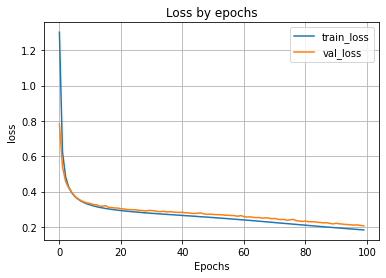

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()


In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h1000.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.9424
Loss on test data: 0.20846791565418243
Accuracy on test data: 0.9423999786376953


In [ ]:
# сохранение модели на диск в папку model_1h1000
model_1h1000.save('model_1h1000')

In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 2, кол-во нейронов в первом скрытом слое = 100, во втором = 50)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h100_2h50 = Sequential()

# 2. добавляем первый скрытый слой
model_1h100_2h50.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем второй скрытый слой
model_1h100_2h50.add(Dense(units=50, activation='sigmoid'))

# 4. добавляем выходной слой
model_1h100_2h50.add(Dense(units=num_classes, activation='softmax'))

# 5. компилируем модель
model_1h100_2h50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h50.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h100_2h50.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 6s 3ms/step - loss: 2.2153 - accuracy: 0.3262 - val_loss: 2.0841 - val_accuracy: 0.5558
Epoch 2/100
1688/1688 [==============================] - 5s 3ms/step - loss: 1.8182 - accuracy: 0.5833 - val_loss: 1.5192 - val_accuracy: 0.6837
Epoch 3/100
1688/1688 [==============================] - 4s 2ms/step - loss: 1.2526 - accuracy: 0.7119 - val_loss: 1.0542 - val_accuracy: 0.7468
Epoch 4/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.9141 - accuracy: 0.7745 - val_loss: 0.8126 - val_accuracy: 0.7928
Epoch 5/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.7314 - accuracy: 0.8127 - val_loss: 0.6708 - val_accuracy: 0.8308
Epoch 6/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6167 - accuracy: 0.8387 - val_loss: 0.5787 - val_accuracy: 0.8518
Epoch 7/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5399 - accuracy: 0.8564 - val_loss: 0.5155 - val_ac

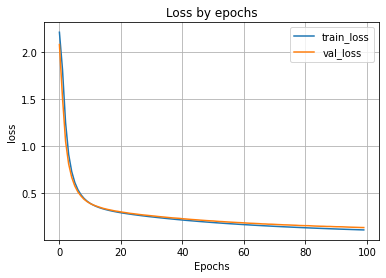

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h50.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1398 - accuracy: 0.9598
Loss on test data: 0.1398417204618454
Accuracy on test data: 0.9598000049591064


In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 2, кол-во нейронов в первом скрытом слое = 100, во втором = 100)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h100_2h100 = Sequential()

# 2. добавляем первый скрытый слой
model_1h100_2h100.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем второй скрытый слой
model_1h100_2h100.add(Dense(units=100, activation='sigmoid'))

# 4. добавляем выходной слой
model_1h100_2h100.add(Dense(units=num_classes, activation='softmax'))

# 5. компилируем модель
model_1h100_2h100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h100.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h100_2h100.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 5s 3ms/step - loss: 2.2276 - accuracy: 0.2994 - val_loss: 2.1069 - val_accuracy: 0.5285
Epoch 2/100
1688/1688 [==============================] - 4s 2ms/step - loss: 1.8371 - accuracy: 0.5935 - val_loss: 1.5244 - val_accuracy: 0.6758
Epoch 3/100
1688/1688 [==============================] - 4s 2ms/step - loss: 1.2330 - accuracy: 0.7222 - val_loss: 1.0174 - val_accuracy: 0.7640
Epoch 4/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8654 - accuracy: 0.7918 - val_loss: 0.7614 - val_accuracy: 0.8135
Epoch 5/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6779 - accuracy: 0.8305 - val_loss: 0.6236 - val_accuracy: 0.8425
Epoch 6/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5710 - accuracy: 0.8523 - val_loss: 0.5411 - val_accuracy: 0.8580
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5035 - accuracy: 0.8659 - val_loss: 0.4865 - val_ac

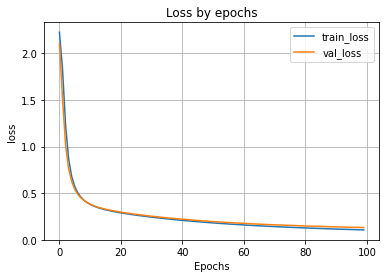

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h100.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.9610
Loss on test data: 0.13643108308315277
Accuracy on test data: 0.9610000252723694


In [ ]:
# Модель нейронной сети (кол-во скрытых слоев = 2, кол-во нейронов в первом скрытом слое = 100, во втором = 300)
# 1. создаем модель - объявляем ее объектом класса Sequential
model_1h100_2h300 = Sequential()

# 2. добавляем первый скрытый слой
model_1h100_2h300.add(Dense(units=100, input_dim=num_pixels, activation='sigmoid'))

# 3. добавляем второй скрытый слой
model_1h100_2h300.add(Dense(units=300, activation='sigmoid'))

# 4. добавляем выходной слой
model_1h100_2h300.add(Dense(units=num_classes, activation='softmax'))

# 5. компилируем модель
model_1h100_2h300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# вывод информации об архитектуре модели
print(model_1h100_2h300.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 300)               30300     
                                                                 
 dense_18 (Dense)            (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Обучаем модель
H = model_1h100_2h300.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
1688/1688 [==============================] - 5s 3ms/step - loss: 2.2378 - accuracy: 0.2430 - val_loss: 2.1353 - val_accuracy: 0.4312
Epoch 2/100
1688/1688 [==============================] - 4s 3ms/step - loss: 1.8785 - accuracy: 0.5314 - val_loss: 1.5695 - val_accuracy: 0.5752
Epoch 3/100
1688/1688 [==============================] - 4s 3ms/step - loss: 1.2396 - accuracy: 0.7056 - val_loss: 1.0109 - val_accuracy: 0.7467
Epoch 4/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.8501 - accuracy: 0.7855 - val_loss: 0.7456 - val_accuracy: 0.8138
Epoch 5/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6621 - accuracy: 0.8255 - val_loss: 0.6116 - val_accuracy: 0.8375
Epoch 6/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5583 - accuracy: 0.8504 - val_loss: 0.5332 - val_accuracy: 0.8553
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4937 - accuracy: 0.8651 - val_loss: 0.4772 - val_ac

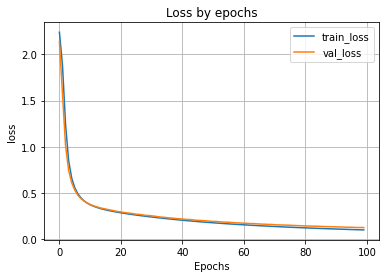

In [ ]:
# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model_1h100_2h300.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9601
Loss on test data: 0.13492631912231445
Accuracy on test data: 0.960099995136261


In [ ]:
#сохраняем модель на диск
model_1h100_2h100.save('model_LR1_best')

NN output: [[1.4312024e-04 2.3466006e-07 6.4750802e-04 1.3773041e-07 3.6195749e-03
  1.0751895e-05 9.9549758e-01 1.6194417e-06 5.0009519e-05 2.9547178e-05]]


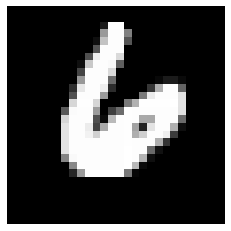

Real mark:  6
NN answer:  6

NN output: [[2.9333177e-04 2.1247262e-05 9.9393553e-01 3.8140067e-03 5.1435786e-06
  5.3885842e-06 1.8418952e-03 8.4266921e-06 7.4960735e-05 1.9337496e-07]]


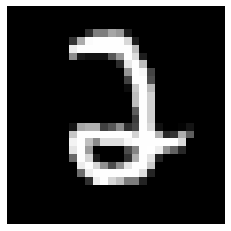

Real mark:  2
NN answer:  2


In [ ]:
# вывод тестового изображения и результата распознавания
n = 3
result = model_1h100_2h100.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))
print('')

result = model_1h100_2h100.predict(X_test[n+1:n+2])
print('NN output:', result)
plt.imshow(X_test[n+1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print('Real mark: ', str(np.argmax(y_test[n+1])))
print('NN answer: ', str(np.argmax(result)))

In [ ]:
#загрузка собственного изображения
from PIL import Image
file_data = Image.open('test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

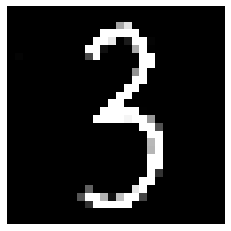

I think it's 3 !


In [ ]:
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)

# распознавание
result = model_1h100_2h100.predict(test_img)
print('I think it\'s',np.argmax(result),'!')

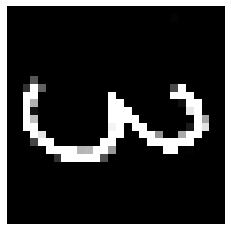

I think it's 2 !


In [ ]:
#загрузка собственного изображения
from PIL import Image
file_data = Image.open('test_1.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)

# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)

# распознавание
result = model_1h100_2h100.predict(test_img)
print('I think it\'s',np.argmax(result),'!')